In [1]:
# These two lines are necessary only if gempy is not installed
import sys, os
sys.path.append("../")

# Importing gempy
import gempy as gp

# Embedding matplotlib figures into the notebooks

import matplotlib.pyplot as plt
%matplotlib inline

# Aux imports
import numpy as np

### Data Import and Setting Dimensions

In [2]:
# Importing the data from csv files and settign extent and resolution
geo_data = gp.create_data([0,20000,0,40000,-4000,1000],[25, 25, 25],
                         path_f = "Pampalo_4c_Foliations.csv",
                         path_i = "Pampalo_4c_Points.csv")

In [3]:
gp.get_raw_data(geo_data, 'interfaces').head()

,X,Y,Z,formation,series,order_series
0,12821.440,16498.970,-1000.0,Fault2,Default serie,1
1,15162.847,31254.625,1.0,Granite3,Default serie,1
2,15162.847,29606.060,1.0,Granite3,Default serie,1
3,15099.440,27386.838,1.0,Granite3,Default serie,1
4,10343.965,39751.074,1.0,Granite3,Default serie,1


In [4]:
gp.set_interfaces(geo_data,geo_data.interfaces[::6])
gp.set_foliations(geo_data,geo_data.foliations[::6])

In [11]:
gp.get_raw_data(geo_data, 'foliations');

In [6]:
geo_data.interfaces.reset_index?

### Plot Input Data

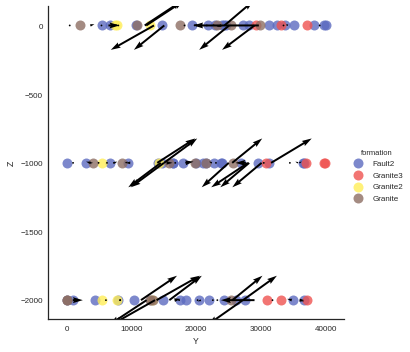

In [7]:
gp.plot_data(geo_data, direction='x')

In [26]:
gp.visualize(geo_data)

In [7]:
gp.get_series(geo_data)

,Default serie
0,Fault2
1,Granite3
2,Granite2
3,Granite


In [8]:
# gp.set_data_series(geo_data,
#                    {"Granite_Series": ("Granite1", "Granite2", "Granite3"),
#                     "Fault2_Series": "Fault2"},
#                    order_series = ["Granite_Series",
#                                    "Fault2_Series"])

In [9]:
#gp.select_series(geo_data, )

In [12]:
gp.set_data_series(geo_data,
                   {"Granite3_Series": 'Granite3',
                    "Granite2_Series": "Granite2",
                    "Granite1_Series": "Granite",
                    "Fault2_Series": ["Fault2"]},
                   order_series = ["Fault2_Series",
                                   "Granite1_Series",
                                   "Granite2_Series",
                                   "Granite3_Series",
                                   ]
                  )

In [16]:
geo_data_f = gp.select_series(geo_data, ['Fault2_Series'] )

In [13]:
geo_data.interfaces;

### Computing the Model

In [17]:
interp_data = gp.InterpolatorInput(geo_data_f, u_grade=[0,],
                                   dtype='float32')

I am in the setting
float32
I am here
[2, 2]


In [19]:
interp_data.data.foliations

,index,X,Y,Z,azimuth,dip,polarity,formation,series,order_series,G_x,G_y,G_z,isFault,formation number
0,0,0.533039,0.45989,0.500094,270.000000,89.0,-1,Fault2,Fault2_Series,1,0.999848,1.836690e-16,-1.745241e-02,True,1
8,49,0.527395,0.569782,0.500094,63.437972,70.0,1,Fault2,Fault2_Series,1,0.840509,4.201990e-01,3.420201e-01,True,1
1,6,0.536044,0.538426,0.500094,270.009696,89.0,-1,Fault2,Fault2_Series,1,0.999848,-1.692013e-04,-1.745241e-02,True,1
2,12,0.522244,0.425199,0.500094,304.397249,70.0,1,Fault2,Fault2_Series,1,-0.775379,5.308581e-01,3.420201e-01,True,1
3,18,0.485987,0.696709,0.500094,92.120300,89.0,1,Fault2,Fault2_Series,1,0.999163,-3.699214e-02,1.745241e-02,True,1
4,24,0.500599,0.626471,0.500094,64.162037,70.0,-1,Fault2,Fault2_Series,1,-0.845752,-4.095439e-01,-3.420201e-01,True,1
5,31,0.534587,0.563127,0.500094,66.243745,70.0,-1,Fault2,Fault2_Series,1,-0.860070,-3.785520e-01,-3.420201e-01,True,1
6,37,0.485867,0.311962,0.500094,89.268245,89.0,1,Fault2,Fault2_Series,1,0.999766,1.276924e-02,1.745241e-02,True,1
18,107,0.497127,0.393728,0.487587,302.496959,70.0,1,Fault2,Fault2_Series,1,-0.792556,5.048544e-01,3.420201e-01,True,1
7,26,0.515239,0.60016,0.500094,56.810355,70.0,-1,Fault2,Fault2_Series,1,-0.786394,-5.143990e-01,-3.420201e-01,True,1


In [14]:
interp_data.data.n_faults

1

In [15]:
interp_data.interpolator.tg.len_series_f.get_value()

array([  0, 294])

In [18]:
sol = gp.compute_model(interp_data)

[0]


In [22]:
sol.shape, 25*25*25

((15733,), 15625)

In [17]:
gp.plot_section(geo_data, sol[0,0,:], 11)
plt.show()
gp.plot_section(geo_data, sol[1,0,:], 11)
plt.show()


IndexError: too many indices for array

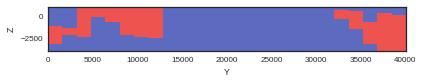

In [25]:
gp.plot_section(geo_data, sol[:15625], 11, plot_data=False, direction='x')
plt.show()

In [25]:
sol

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,
        0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
        0.,  1.,  1.,  1.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,
        1.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  1.,  0.,
        0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,
        0.,  0.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  0.,  1.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  1

In [24]:
50*50*50

125000

In [ ]:
5*55